In [1]:
"""
Purpose: To demonstrate how to access the computed features of a neuron
generated at different stages the preprocessing pipeline

If more information on how to access the different hierarchices of a neuron object (branch, limb, neuron)
please refer to the ipynb tutorial titled "Neuron_Limb_Branch_Hierarchical_Data_Structure"
"""

'\nPurpose: To demonstrate how to access the computed features of a neuron\ngenerated at different stages the preprocessing pipeline\n\nIf more information on how to access the different hierarchices of a neuron object (branch, limb, neuron)\nplease refer to the ipynb tutorial titled "Neuron_Limb_Branch_Hierarchical_Data_Structure"\n'

In [2]:
%load_ext autoreload 
%autoreload 2

In [3]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
from neurd import neuron_visualizations as nviz
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

HTTP request sent; waiting for response./1.1 302 FOUND                      

>

In [5]:
import numpy as np

# Loading a neuron object

In [6]:
from neurd import neuron_utils as nru

In [7]:
mesh_path = "../Auto_Proof_Pipeline/Double_Soma/864691135510518224.off"
obj_autoproof_path = "../Auto_Proof_Pipeline/Double_Soma/864691135510518224_auto_proof.pbz2"
obj_path = "../Auto_Proof_Pipeline/Double_Soma/864691135510518224.pbz2"

n_obj = nru.decompress_neuron(
    filepath=obj_path,
    original_mesh=mesh_path
)

n_obj_proof = nru.decompress_neuron(
    filepath=obj_autoproof_path,
    original_mesh=mesh_path
)

Decompressing Neuron in minimal output mode...please wait
Decompressing Neuron in minimal output mode...please wait


In [8]:
mesh = n_obj.mesh

In [9]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(mesh)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Feature Background Information

In [10]:
"""
Features can be accesed using the following access points

a) neuron/limb/branch attributes:
attributes/properties of the objects

b) pipeline products: the datastructure attached to the 
neuron object as an attribute that stores computed
features or meta data from different stages of the processing pipeline

- Note: all data stored in pipeline products can be accessed
like an attribute/property of the neuron object (enabled
by overriding the __getattr__ class function

c) dynamic attributes: an external function provided by utility
modules in NEURD or a function needed to be implemented by the user
is needed to generate a certain feature (although all the raw
inputs are avaible in the neuron object)

d) neuron lite attribute: When the simplified networkx structure
of the neuron is generated, some features are computed or
easier to acces

"""

'\nFeatures can be accesed using the following access points\n\na) neuron/limb/branch attributes:\nattributes/properties of the objects\n\nb) pipeline products: the datastructure attached to the \nneuron object as an attribute that stores computed\nfeatures or meta data from different stages of the processing pipeline\n\n- Note: all data stored in pipeline products can be accessed\nlike an attribute/property of the neuron object (enabled\nby overriding the __getattr__ class function\n\nc) dynamic attributes: an external function provided by utility\nmodules in NEURD or a function needed to be implemented by the user\nis needed to generate a certain feature (although all the raw\ninputs are avaible in the neuron object)\n\nd) neuron lite attribute: When the simplified networkx structure\nof the neuron is generated, some features are computed or\neasier to acces\n\n'

## Definitions

In [11]:
"""
skeleton
--------
Nx2x3 numpy array where each row (a 2x3 array) are two 3D coordinates
that define one segment of the skeleton

neuron object lite
-----------------
a non-hierarchical simplified networkx data structure representation
of the neuron where nodes are branches (with name "L{limb_idx}_{node_idx}") or somas
with thier respective attributes and edges connect adjacent branch objects

limb_branch_dict
----------------
a dictionary object where the
keys are the limb name (Ex: L1 for the 2nd limb) and 
the values are the branch names

 {'L0': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'L1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 'L4': array([0, 1, 2, 3, 4, 5, 6]),
 'L5': array([0]),
 'L6': array([0]),
 'L2': array([0, 1, 2]),
 'L3': array([0, 1, 2, 3, 4]),
 'L7': array([0, 1, 2])}


concept_network
---------------
neuron and limb attribute that is a networkx graph that stores
the behind the scenes graph connectivity of the nodes (limbs/somas for neuron and branches for limb)

concept_network_directed
------------------------
limb attribute that is a networkx graph that stores
the behind the scenes directed graph connectivity of which 
branches are connected and direction describes direction away from the soma

root
-----------
most upstream branch of a certain subgraph

"""
""""""

''

In [12]:
n_obj.concept_network

## Example of how to access pipeline products

In [ ]:
data = n_obj.pipeline_products
for k in data.stages:
    print(k)

In [ ]:
stage_data = data['soma_identification']
print(stage_data)

In [ ]:
data = n_obj_proof.pipeline_products
for k in data.stages:
    print(k)

# 2. Soma Identification

## b) pipeline products

In [ ]:
stage_products = n_obj.pipeline_products['soma_identification']
stage_products

### soma meshes

In [ ]:
soma_meshes = stage_products["soma_meshes"]
# using attribute method as a faster way of accessing pipeline products 
soma_meshes = n_obj.soma_meshes

In [ ]:
ipvu.plot_objects(
    mesh,
    meshes = soma_meshes,
    meshes_colors="red"
)

### nuclei_meshes

In [ ]:
nuclei_meshes = stage_products['nuclei_meshes']
# using attribute method as a faster way of accessing pipeline products 
nuclei_meshes = n_obj.nuclei_meshes

In [ ]:
ipvu.plot_objects(
    mesh,
    meshes = nuclei_meshes,
    meshes_colors="red"
)

### glia meshes

In [ ]:
glia_meshes= stage_products['glia_meshes']
# using attribute method as a faster way of accessing pipeline products 
glia_meshes = n_obj.glia_meshes

# 3. Decomposition

In [ ]:
nviz.visualize_neuron(
    n_obj,
    limb_branch_dict="all"
)

## a) Attributes

### limbs

In [ ]:
n_obj.limbs

In [ ]:
# or could access by iterating through the neuron object like a list
limbs = [k for k in n_obj]
limbs

### specific limb: access like a dictionary using limb name or limb idx

In [ ]:
# accessing the 5th limb
limb_obj = n_obj["L5"]
limb_obj = n_obj["L5"]

### branches

In [ ]:
limb = n_obj["L1"]
limb.branches

In [ ]:
# or could access by iterating through the limb object like a list
limb = n_obj["L4"]
branches = [k for k in limb]
branches

### specific branch: access like a dictionary using branch idx (not ordered in a particular order)

In [ ]:
# access the 4th branch
branch = limb[4]
branch

In [ ]:
print(spu.Spine.__doc__)

### concept network

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# neuron concept network
G = n_obj.concept_network
nx.draw(G,with_labels = True)
plt.show()

# pretties way of plotting
nviz.plot_soma_limb_concept_network(n_obj)

In [ ]:
# neuron concept network
limb_idx = 0
limb = n_obj[limb_idx]

G = limb.concept_network_directional
nx.draw(G,with_labels = True)
plt.show()

#pretties way of plotting
nviz.plot_limb(n_obj,limb_idx)

### mesh

In [ ]:
#neron_mesh
n_obj.mesh 
# limb mesh
limb_0_mesh = n_obj[0].mesh
limb_2_mesh = n_obj["L2"].mesh
#branch mesh
limb_0_branch_1_mesh = n_obj[0][1].mesh
#soma mesh
soma_1_mesh = n_obj["S0"].mesh
soma_2_mesh = n_obj["S1"].mesh

In [ ]:
ipvu.plot_objects(
    mesh,
    meshes = [soma_1_mesh,soma_2_mesh,limb_2_mesh,limb_0_branch_1_mesh],
    meshes_colors = ['red','pink','aqua','orange']
)

### [mean/max/sum/std]\_node\_[feature]

In [ ]:
feature_name = "area"

#option 1: using list comprehension
node_features = np.array([getattr(branch,feature_name) for limb in n_obj for branch in limb])

#option 2: using explicit for loop
node_features = []
for limb in n_obj:
    for branch in limb:
        node_features.append(getattr(branch,feature_name))

print(f"mean {feature_name} = {np.mean(node_features):.2f}")
print(f"max {feature_name} = {np.max(node_features):.2f}")
print(f"std {feature_name} = {np.std(node_features):.2f}")
print(f"sum {feature_name} = {np.sum(node_features):.2f}")

### [parent/children/siblings]\_feature\_[max/min]

In [ ]:
from neurd import limb_utils as lu

In [ ]:
# picking the limb 
limb_name = "L0"

nviz.plot_limb(n_obj,limb_name)

### Ex: children\_skeletal_angle\_[max/min]

In [ ]:
limb = n_obj[limb_name]
#picking the branch
branch_idx = 8
branch = limb[branch_idx]

from neurd import limb_utils as lu

min_angle = lu.children_skeletal_angle_min(limb,branch_idx,verbose = True)
print(f"min_angle = {min_angle}\n")
max_angle = lu.children_skeletal_angle_max(limb,branch_idx,verbose = True)
print(f"max_angle = {max_angle}")

### area (um**2)

In [ ]:
n_obj.area # neuron area
n_obj["L0"].area # limb area
n_obj["L1"][2].area # branch area
n_obj["S0"].area # 1st soma area

### soma_area: sum of area of all somas

In [ ]:
n_obj.soma_area

### best node feature match example: best width_overall match in children

In [ ]:
limb_idx = 0
limb = n_obj[limb_idx]

nviz.plot_limb(n_obj,limb_idx)

In [ ]:
lu.best_feature_match_in_descendents(
    limb,
    branch_idx = 6,
    feature = "width_overall"
)


### endpoint\_[downstream/upstream]

In [ ]:
branch = n_obj[2][0]
branch

In [ ]:
upstream = branch.endpoint_upstream
downstream = branch.endpoint_downstream

In [ ]:
nviz.plot_objects(
    mesh,
    meshes = [branch.mesh],
    meshes_colors=["red"],
    scatters=[upstream,downstream],
    scatters_colors=["yellow","aqua"]
)

### insignificant limbs

In [ ]:
n_obj.insignificant_limbs

### multi_soma_touching_limbs

In [ ]:
n_obj.multi_soma_touching_limbs

In [ ]:
n_obj.n_multi_soma_touching_limbs

### n_same_soma_multi_touching_limbs

In [ ]:
n_obj.n_same_soma_multi_touching_limbs

### touching_somas`

In [ ]:
n_obj[0].touching_somas(),n_obj[4].touching_somas()

### n_somas

In [ ]:
n_obj.n_somas

In [ ]:
# can access the soma objects like a dictionary with indexing name as S{idx}, indexing starting at 0
n_obj["S0"],n_obj["S1"]

### n_branches

In [ ]:
print(f"# of branches in neuron = {n_obj.n_branches}")
print(f"# of branches in limb 2 = {n_obj[2].n_branches}")

### n_branches_per_limb

In [ ]:
n_obj.n_branches_per_limb

### mesh volume attributes

In [ ]:
print(f"neuron mesh volume without somas = {n_obj.mesh_volume}")
print(f"neuron mesh volume without somas = {n_obj.mesh_volume_with_somas}")
print(f"limb 2 volume = {n_obj['L2'].mesh_volume}")
print(f"limb 2 branch 0 volume = {n_obj['L2'][0].mesh_volume}")
print(f"soma 1 volume = {n_obj['S0'].mesh_volume}")

### skeleton

In [ ]:
neuron_skeleton = n_obj.skeleton
limb_skeleton = n_obj[5].skeleton
branch_skeleton = n_obj[0][3].skeleton

ipvu.plot_objects(
    mesh,
    skeletons = [neuron_skeleton,limb_skeleton,branch_skeleton],
    skeletons_colors=["orange",'brown',"black"]
)

### skeletal length

In [ ]:
print(f"neuron skeletal length (nm) = {n_obj.skeletal_length:.2f}" )
print(f"limb skeletal length (nm) = {n_obj[1].skeletal_length:.2f}" )
print(f"branch skeletal length (nm) = {n_obj[1][0].skeletal_length:.2f}" )

### skeleton_bounding_box

In [ ]:
from mesh_tools import skeleton_utils as sk
sk.bbox(n_obj.skeleton)
sk.bbox(n_obj[0].skeleton)

### skeletal_angle_[start/end]

In [ ]:
branch = n_obj[0][9]
nviz.plot_branch(branch,axis_box_off=False)

In [ ]:
branch.skeleton_vector_downstream

In [ ]:
branch.skeleton_vector_upstream

### spines

In [ ]:
n_obj.spines
n_obj[0].spines
n_obj[0][5].spines

In [ ]:
n_obj.n_spines
n_obj[0].n_spines
n_obj[0][5].n_spines

### total_spine_volume

In [ ]:
from neurd import neuron_utils as nru
nru.total_spine_volume(n_obj)
nru.total_spine_volume(limb)
nru.total_spine_volume(branch)

### width features

In [ ]:
branch = n_obj[0][4]

In [ ]:
branch.width_overall

In [ ]:
branch.width_new

In [ ]:
branch.width_array

In [ ]:
branch.width_array_upstream_to_downstream

In [ ]:
branch.width_upstream, branch.width_downstream

### root_[width/skeleton_vector_from_soma]

In [ ]:
lu.root_skeleton_vector_from_soma(
    neuron_obj = n_obj,
    limb_idx = 3,
    soma_name = "S0",
)

In [ ]:
lu.root_width(n_obj[limb_idx])

## b) Pipeline Products (can be accessed like attributes)

In [ ]:
stage = n_obj.pipeline_products["decomposition"]
print(stage)

### bbox\_[x/y/z]\_[min/max] (\_soma_relative)

In [ ]:
n_obj.bbox_x_min

In [ ]:
n_obj.bbox_x_min_soma_relative

### branch\_length\_[mean/median]

In [ ]:
n_obj.branch_length_mean

In [ ]:
n_obj.branch_length_median

### overall width summary statistics

In [ ]:
n_obj.width_no_spine_90_perc

In [ ]:
n_obj.width_no_spine_median

# ---- Switching our neuron object ot n_obj_proof because that is one that is fully automatic proofread

In [ ]:
nviz.visualize_neuron(
    n_obj_proof,
    limb_branch_dict="all"
)

# 4. Multi-Soma Split

# a) Attributes

### n_error_limbs

In [ ]:
n_obj_proof.n_error_limbs

In [ ]:
"""
a dictionary data structure that stores for each limb
- valid points: coordinates that should belong to the existing neuronal process ( a marker of where the valid mesh is). 
- error points: coordinates that should belong to incorrect neuronal process resulting from merge errors ( a marker of where the error mesh starts)
- coordinate: locations of split points used in the elimination of soma to soma paths

The valid and error points can be used as inputs for automatic mesh splitting algorithms in other pipelines (ex: Neuroglancer)
"""

### red_blue_split_points_by_limb

In [ ]:
from neurd import soma_splitting_utils as ssu
print(ssu.limb_red_blue_dict_from_red_blue_splits.__doc__)

In [ ]:
n_obj_proof.red_blue_split_points_by_limb

# b) Pipeline Products

In [ ]:
n_obj_proof.pipeline_products.stages

In [ ]:
split_suggestion_stage = n_obj_proof.pipeline_products["multi_soma_split_suggestions"]
print(f"multi_soma_split_suggestions = {split_suggestion_stage.keys()}")
split_suggestion_stage = n_obj_proof.pipeline_products["multi_soma_split_execution"]
print(f"multi_soma_split_execution = {split_suggestion_stage.keys()}")

### n_paths_cut

In [ ]:
# getting n_paths cut from pipeline products
n_paths_cut = n_obj_proof.pipeline_products["multi_soma_split_suggestions"]["n_paths_cut"]

# using short cut
n_paths_cut = n_obj_proof.n_paths_cut

n_paths_cut

# 5. Cell Typing

## a) Attributes

### axon_starting_coordinate

In [ ]:
n_obj_proof.axon_starting_coordinate

### spines_obj

In [ ]:
"""
A list list of spine objects where each object stores information about the spine
"""
from neurd import spine_utils as spu
print(spu.Spine.__doc__)

In [ ]:
# neuron spines
n_obj_proof.spines_obj
# limb spines
n_obj_proof[0].spines_obj
# branch spines
n_obj_proof[0][5].spines_obj

In [ ]:
limb_idx = 0
branch_idx = 0
spine_idx = 1

branch = n_obj_proof[limb_idx][branch_idx]

spine = branch.spines_obj[spine_idx]
spine.export()

### spine_obj attributes demo

In [ ]:
nviz.plot_branches_with_spines(branch)

In [ ]:
#mesh_face_idx: a list of face indices of the branch that belong to the spine mesh
spine_mesh_reconstructed = branch.mesh.submesh([spine.mesh_face_idx],append=True)

ipvu.plot_objects(
    branch.mesh,
    meshes = [spine_mesh_reconstructed],
    meshes_colors="red"
)

In [ ]:
spine_mesh_head = spine.mesh.submesh([spine.head_face_idx],append=True)
spine_mesh_neck = spine.mesh.submesh([spine.neck_face_idx],append=True)

ipvu.plot_objects(
    branch.mesh,
    meshes = [spine_mesh_head,spine_mesh_neck],
    meshes_colors = ['red','aqua'],
    scatters=[spine.coordinate],
    main_skeleton = spine.skeleton,
)

### spine_volume_density

In [ ]:
from neurd import spine_utils as spu

print(f"Spine densithy for whole neuron = {spu.spine_volume_density(n_obj_proof)}")
print(f"Spine densithy for limb 0 = {spu.spine_volume_density(n_obj_proof[0])}")
print(f"Spine densithy for limb 0 branch 2 = {spu.spine_volume_density(n_obj_proof[2])}")

### spine_density

In [ ]:
from neurd import spine_utils as spu

print(f"Spine densithy for whole neuron = {spu.spine_density(n_obj_proof)}")
print(f"Spine densithy for limb 0 = {spu.spine_density(n_obj_proof[0])}")
print(f"Spine densithy for limb 0 branch 2 = {spu.spine_density(n_obj_proof[2])}")

### head_neck_shaft_idx

In [ ]:
branch.head_neck_shaft_idx

### synapses

In [ ]:
n_obj_proof.synapses
n_obj_proof[0].synapses
n_obj_proof[0][6].synapses

### synapses df (concisely shows all synapse information for cell)

In [ ]:
from neurd import synapse_utils as syu
neuron_synapse_df = syu.synapses_df(n_obj_proof)

In [ ]:
"""
Note: You could then restrict this dataframe with whatever custom query you want

"""

In [ ]:
branch = n_obj_proof[0][6]
branch_synapse_df = syu.synapses_df(branch)
branch_synapse_df

### synapses_[head/neck/no_head/shaft/spine]

In [ ]:
import synapse_utils as syu
# number of synapses onto a spine head for the whole neuron 
syu.n_synapses_head(n_obj_proof)

In [ ]:
# number of synapses onto a spine head for the 1st limb
syu.n_synapses_head(n_obj_proof[0])

In [ ]:
syu.n_synapses_shaft(n_obj_proof)

### plotting the synapses

In [ ]:
syu.plot_synapses(n_obj_proof)

### [axon/dendrite]_[mesh/skeleton/limb_branch_dict]

In [ ]:
n_obj_proof.axon_mesh

In [ ]:
n_obj_proof.axon_limb_branch_dict

In [ ]:
# NOTE: this picture is after automatic proofreading has already been applied
ipvu.plot_objects(
    n_obj_proof["S0"].mesh,
    meshes = [n_obj_proof.axon_mesh,n_obj_proof.dendrite_mesh],
    meshes_colors=["orange","purple"],
    skeletons = [n_obj_proof.axon_skeleton,n_obj_proof.dendrite_skeleton],
    skeletons_colors=["red","aqua"],
)

In [ ]:
nviz.plot_axon(n_obj_proof)

### [axon/dendrite]_skeleton

In [ ]:
n_obj_proof.axon_skeleton

### bouton_meshes

In [ ]:
nviz.plot_boutons(n_obj_proof)

### synapses_[pre/post]

In [ ]:
n_obj_proof.synapses_pre
n_obj_proof[0][0].synapses_post

### n_synapses_[somas/error]

In [ ]:
n_obj_proof.n_synapses_somas

In [ ]:
n_obj_proof.n_synapses_error

## b) Pipeline Products [THESE RESULTS WILL ALL BE BEFORE AUTOMATIC PROOFREADING WAS APPLIED, and the neuron object currently being used is from after the automatic proofreading stage, which is why some numbers might differ)

In [ ]:
n_obj_proof.stages

In [ ]:
stage_products = n_obj_proof.pipeline_products["cell_type_ax_dendr"]
print(stage_products)

### [axon/dendrite]\_angle_[max/min]

In [ ]:
n_obj_proof.n_boutons

In [ ]:
stage_products.axon_angle_max

#using the shortcut
n_obj_proof.axon_angle_max

### [axon/dendrite]\_bbox_[x/y/z]_[min/max] (_soma_relative)

In [ ]:
stage_products.axon_bbox_x_min
stage_products.axon_bbox_x_max_soma_relative

In [ ]:
stage_products.dendrite_bbox_x_max_soma_relative

### baylor_cell_type

In [ ]:
stage_products.baylor_cell_type

In [ ]:
stage_products.baylor_cell_type_exc_probability

### neuron objects lite

In [ ]:
stage_products.neuron_graph_axon_labeled

In [ ]:
stage_products.neuron_graph_high_fid_axon

In [ ]:
from neuron_morphology_tools import neuron_nx_utils as nxu
nxu.draw_tree(stage_products.neuron_graph_high_fid_axon)

### syn_density_[head/neck/shaft/no_head]

In [ ]:
stage_products.syn_density_head


In [ ]:
stage_products.syn_density_neck

# 6. Auto Proofreading

## a) Attributes

### error synapses

In [ ]:
n_obj_proof.distance_errored_synapses

In [ ]:
n_obj_proof.mesh_errored_synapses

In [ ]:
n_obj_proof.mesh_errored_synapses_pre

### [compartment]_limb_branch_dict

In [ ]:
basal_limb_branch_dict = n_obj_proof.basal_limb_branch_dict
basal_limb_branch_dict

### [compartment]_[mesh/skeleton]

In [ ]:
from neurd import neuron_utils as nru
basal_mesh = nru.mesh_over_limb_branch_dict(n_obj_proof,basal_limb_branch_dict)
basal_skeleton = nru.skeleton_over_limb_branch_dict(n_obj_proof,basal_limb_branch_dict)

ipvu.plot_objects(
    n_obj_proof["S0"].mesh,
    meshes = [basal_mesh],
    meshes_colors="red",
    skeletons = [basal_skeleton]
)

### [comp]_skeletal_length

In [ ]:
from mesh_tools import skeleton_utils as sk
sk.calculate_skeleton_distance(basal_skeleton)

## b) Pipeline Products

In [21]:
n_obj_proof.pipeline_products.stages

['decimation',
 'soma_identification',
 'decomposition',
 'multi_soma_split_suggestions',
 'multi_soma_split_execution',
 'cell_type_ax_dendr',
 'auto_proof']

In [22]:
stage_products = n_obj_proof.pipeline_products["auto_proof"]
print(stage_products)

    apical_bbox_volume:0
    apical_bbox_x_max:0
    apical_bbox_x_max_soma_relative:0
    apical_bbox_x_min:0
    apical_bbox_x_min_soma_relative:0
    apical_bbox_y_max:0
    apical_bbox_y_max_soma_relative:0
    apical_bbox_y_min:0
    apical_bbox_y_min_soma_relative:0
    apical_bbox_z_max:0
    apical_bbox_z_max_soma_relative:0
    apical_bbox_z_min:0
    apical_bbox_z_min_soma_relative:0
    apical_branch_length_mean:0
    apical_branch_length_median:0
    apical_n_limbs:0
    apical_n_long_branches:0
    apical_n_medium_branches:0
    apical_n_short_branches:0
    apical_soma_angle_max:None
    apical_soma_angle_min:None
    axon_area:100.90173802125518
    axon_bbox_volume:0.020887414933042067
    axon_bbox_x_max:1484351.0
    axon_bbox_x_max_soma_relative:-4529.7605831723195
    axon_bbox_x_min:1464809.3443508793
    axon_bbox_x_min_soma_relative:-24071.416232293006
    axon_bbox_y_max:645340.1
    axon_bbox_y_max_soma_relative:56040.00626207271
    axon_bbox_y_min:588094.9182

In [23]:
[k for k in list(stage_products.export().keys()) if "filt" in k]

['filtering_info', 'split_locations_before_filter']

### [compartment]\_bbox_[x/y/z]_[min/max] (_soma_relative)

In [ ]:
stage_products.basal_bbox_x_max_soma_relative

### [compartment]\_branch_length_[mean/median]

In [ ]:
stage_products.apical_branch_length_mean

#shortcut
n_obj_proof.apical_branch_length_mean

### [compartment]_n_limbs

In [ ]:
stage_products.basal_n_limbs

#shortcut
n_obj_proof.basal_n_limbs

### [compartment]\_soma_angle_[max/min]

In [ ]:
print(stage_products.axon_soma_angle_max)
print(stage_products.basal_soma_angle_max)
print(stage_products.apical_soma_angle_max)

### [error_filter]\_error_[length/area]

In [ ]:
[k for k in stage_products if "error_length" in k or "error_area" in k]

In [ ]:
stage_products.high_degree_branching_error_area

#shortcut
n_obj_proof.width_jump_up_dendrite_error_area

### [max/min]_[comp]_root_skeletal_angle

In [13]:
from neurd import neuron_utils as nru

In [14]:
nru.compartment_root_skeleton_angle_max(
    n_obj_proof,
    compartment = "basal",
    return_limb_branch_idx = True
)

(160.9491, 'L0_6')

limb_name = L0

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

No limb name was given so using L0 because was the limb in the first key


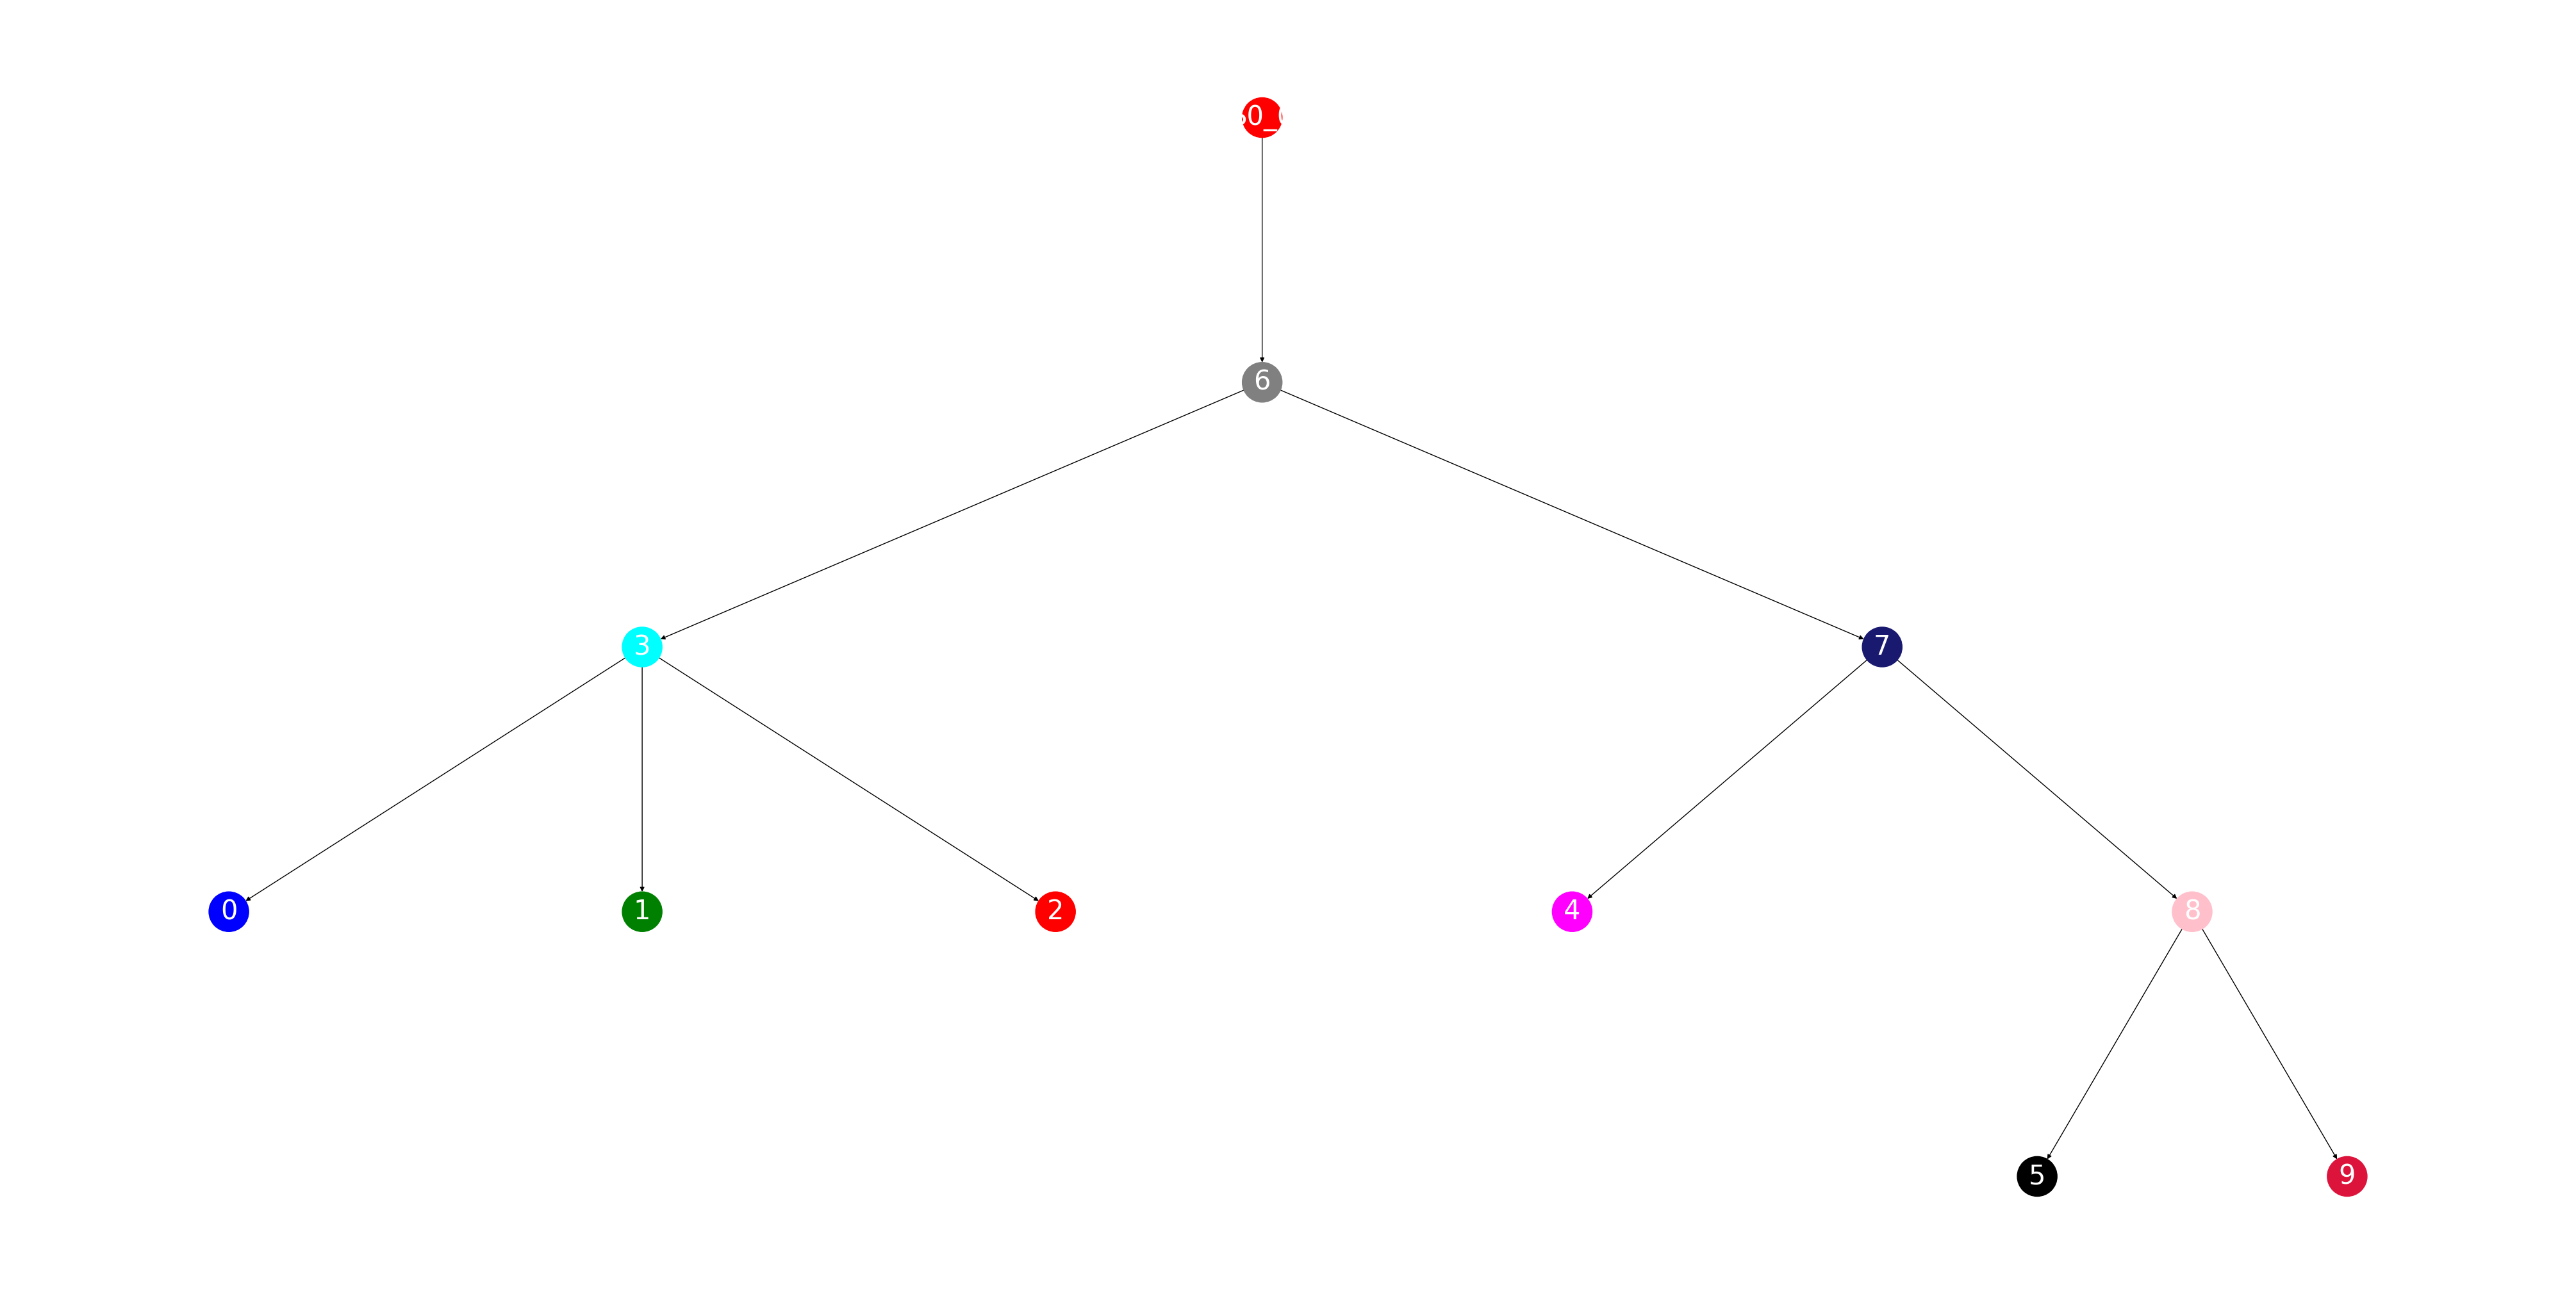

In [15]:
nviz.plot_limb(n_obj_proof,"L0")

In [16]:
nru.compartment_root_skeleton_angle_min(
    n_obj_proof,
    compartment = "basal",
    return_limb_branch_idx = True
)

(56.0119, 'L4_0')

limb_name = L4

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

No limb name was given so using L4 because was the limb in the first key


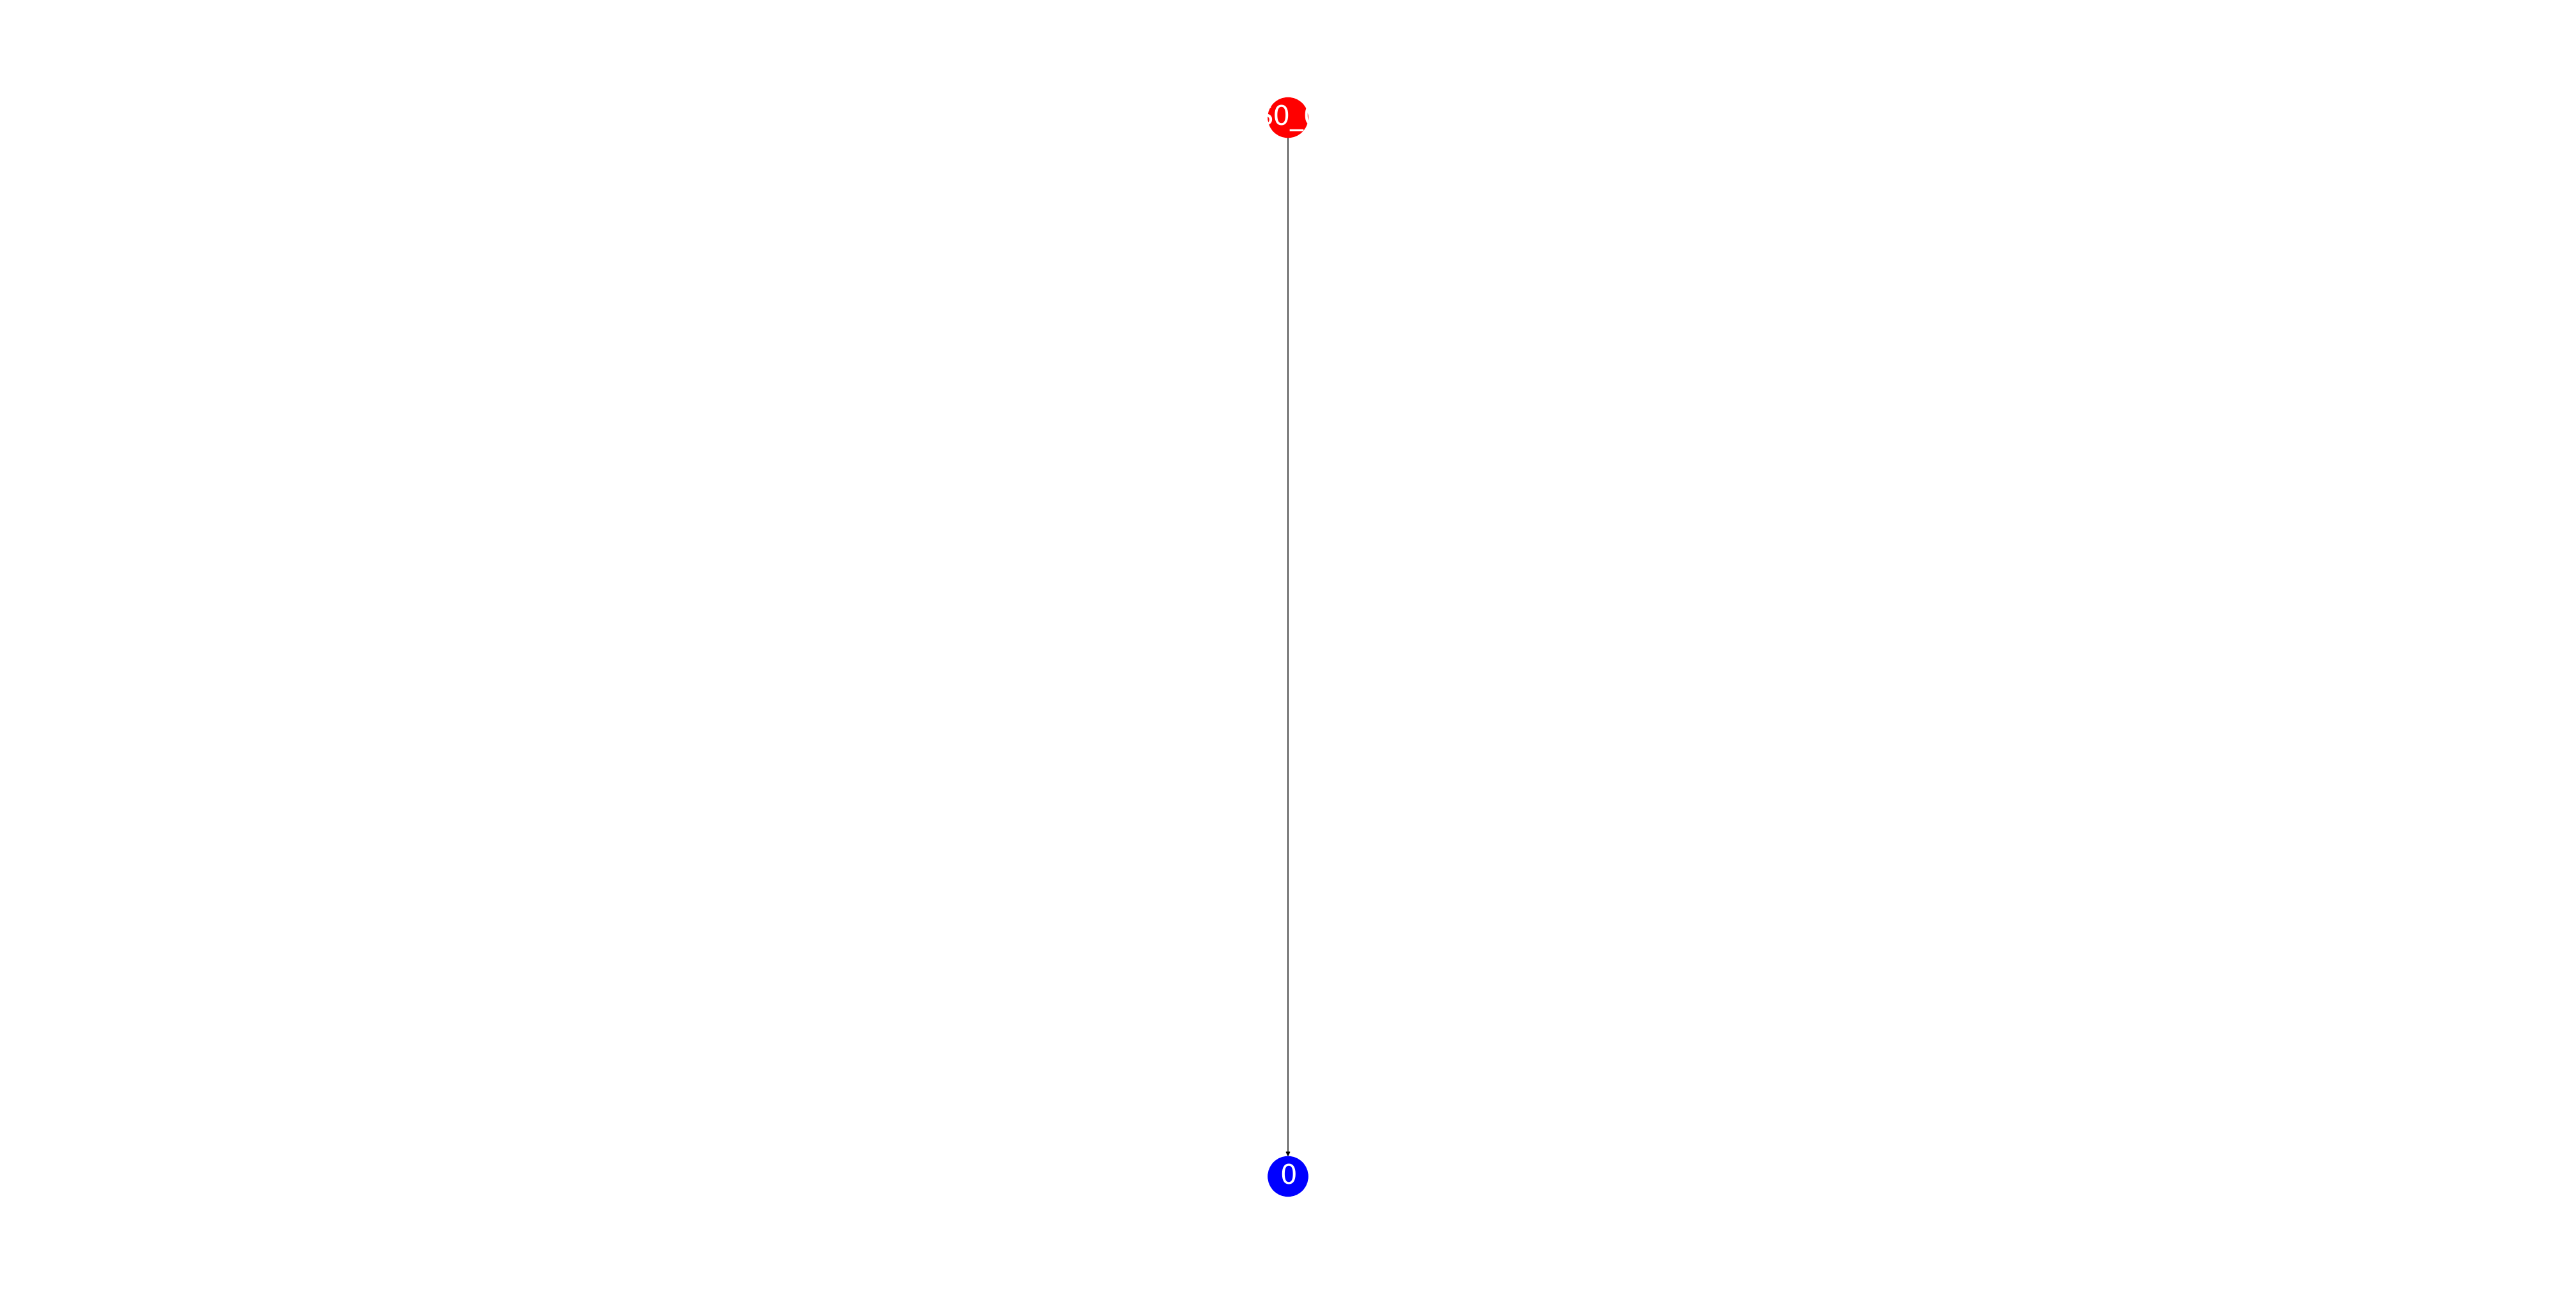

In [17]:
nviz.plot_limb(n_obj_proof,"L4")

In [18]:
nru.compartment_root_width_max(
    n_obj_proof,
    compartment = "basal",
    return_limb_branch_idx = True
)

(993.5369344097928, 'L2_1')

In [19]:
nru.compartment_root_width_min(
    n_obj_proof,
    compartment = "basal",
    return_limb_branch_idx = True
)

(259.6057416262785, 'L4_0')

### [merge_filter]_locations

In [20]:
[k for k in stage_products.export()]

NameError: name 'stage_products' is not defined